In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df= pd.read_csv("http://bit.ly/w-data")   

In [21]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [23]:
df.isnull == True

False

In [24]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# VISUALISING THE DATA


Text(0.5, 1.0, 'corelation between the data')

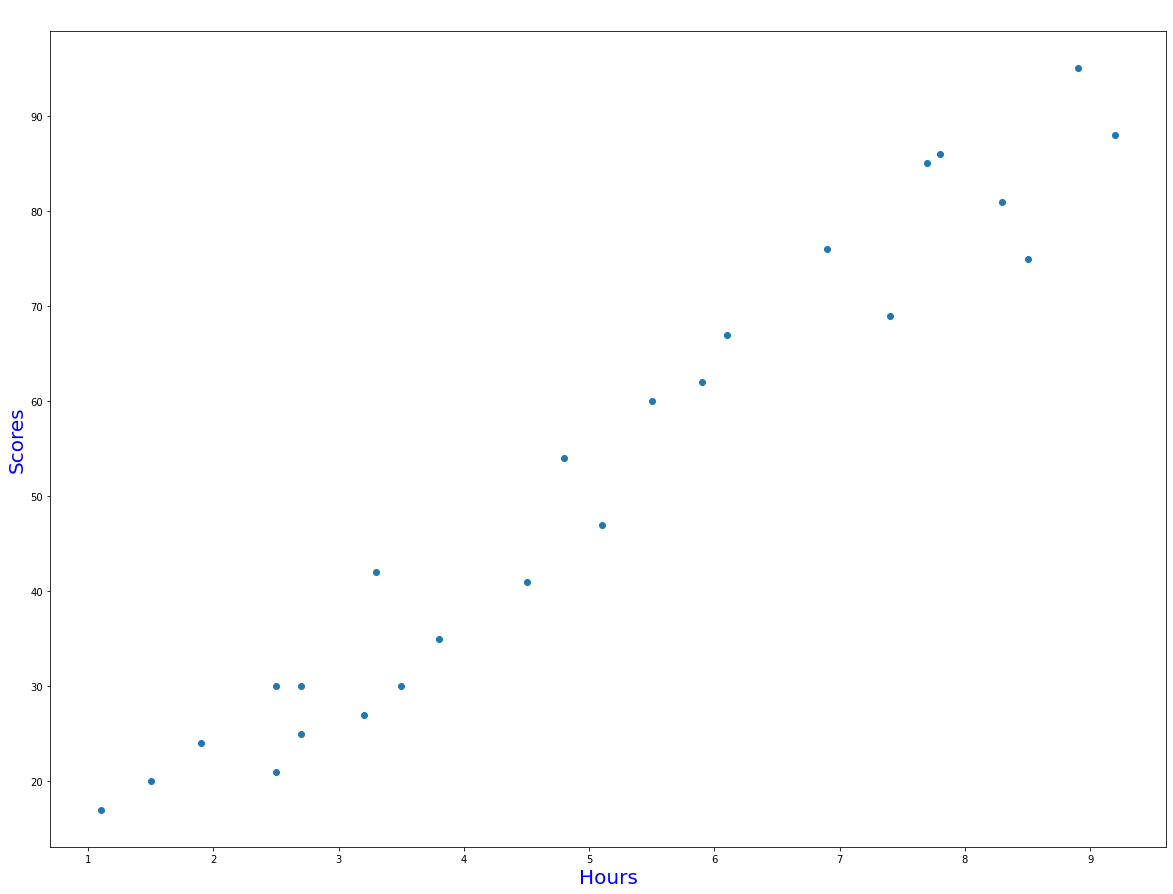

In [25]:
plt.figure(figsize=(20,15))
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours', color='blue', fontsize=20)
plt.ylabel('Scores', color='blue', fontsize=20)
plt.title('corelation between the data', fontsize=25, color='white')


Text(0, 0.5, 'Scores')

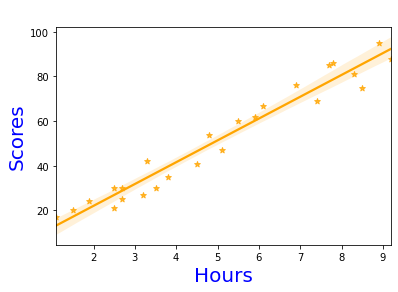

In [26]:
sns.regplot(x='Hours',y='Scores',data=df, marker='*',color='orange')
plt.title('Hours vs scores', color='white', fontsize=20)
plt.xlabel('Hours', fontsize=20, color='blue')
plt.ylabel('Scores', fontsize=20, color='blue')

# TRAIN TEST SPLIT

In [32]:
X= df.iloc[:, :1].to_numpy()
Y= df.iloc[:, 1:].to_numpy()

In [33]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression()

# predicting the outcome

In [39]:
y_pred= regr.predict(x_test)
y_pred

array([[83.39168645],
       [27.07054902],
       [27.07054902],
       [69.79692914],
       [60.0863882 ],
       [29.0126572 ],
       [34.83898177],
       [52.31795545]])

In [44]:
df_pred=pd.DataFrame({'Actual': [i[0] for i in y_test], 'predicted': [i[0] for i in y_pred]})
df_pred

,Actual,predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


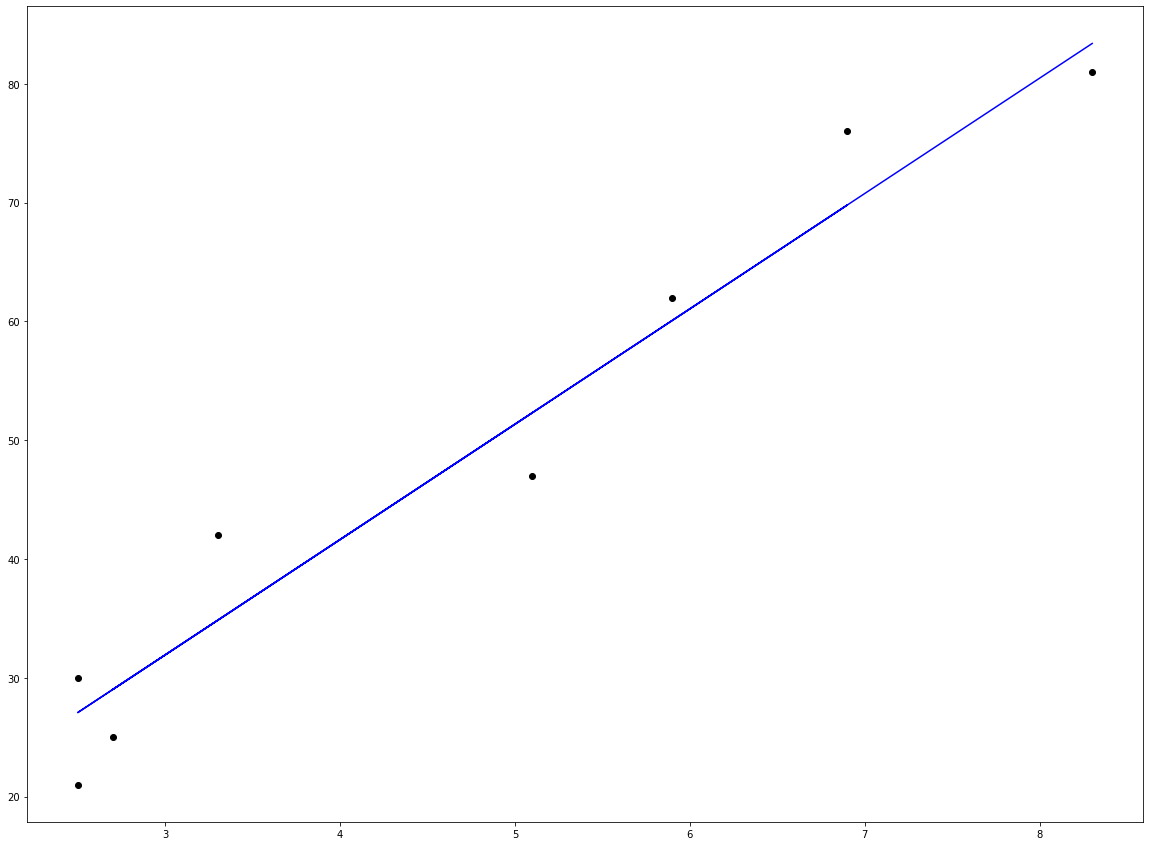

In [46]:
plt.figure(figsize=(20,15))
plt.scatter(x_test,y_test,color='black')
plt.plot(x_test,y_pred, color='blue')

# EVALUATING THE MODEL

In [47]:
from sklearn import metrics
print('Mean Absolute Error:' ,metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Square Error:' ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.499999999999998
Root Mean Square Error: 4.859985351228103


# EVALUATING THE MODEL

In [51]:
 pred_score= regr.predict([[9.25]])


In [52]:
print('THE STUDENTS WHO STUDIED FOR 9.25 HOURS A DAY WILL GET ', round(pred_score[0][0],3))

THE STUDENTS WHO STUDIED FOR 9.25 HOURS A DAY WILL GET  92.617
